In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib qt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [30]:
# --- Local modules
from modules import *

# Display parameters
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
os.environ['MKL_VERBOSE'] = '0'

# Path

In [6]:
# Variables
sub_nb=1

In [11]:
# Path names
# -- root
root_path='/Volumes/T5_EVO/1-experiments/REPLAYSEQ/1-data_ICM'
# ---- Behavior
behavior_path=root_path+'/behavior'
behavior_sub=behavior_path+f'/sub-0{sub_nb}_2024-04-10_09h41.08.639_results.csv'

# ---- Epochs
full_sequences_path=root_path+f'/3-epochs_sequences/mne-bids-pipeline/sub-0{sub_nb}/meg'
items_path=root_path+f'/2-epochs_items/mne-bids-pipeline/sub-0{sub_nb}/meg'
resting_state_path=root_path+f'/1-epochs_resting_state/mne-bids-pipeline/sub-0{sub_nb}/meg'
# ------ fif path
seq_run_01_path=full_sequences_path+f'/sub-0{sub_nb}_task-reproduction_epo.fif'
items_epoch_path=items_path+f'/sub-0{sub_nb}_task-reproduction-epo.fif'
resting_state_epoch_path=resting_state_path+f'/sub-0{sub_nb}_task-reproduction_proc-ica_epo.fif'

# -- Save plot path
save_path_local_plots=f'/Users/et/Documents/UNICOG/2-MEG_analysis/1-MEGSEQ/1-Results/subjects/sub-0{sub_nb}/plots'
save_path_volume_plots=f'/Volumes/T5_EVO/1-experiments/REPLAYSEQ/5-plots/sub-0{sub_nb}'
save_path_local_objects=f'/Users/et/Documents/UNICOG/2-MEG_analysis/1-MEGSEQ/1-Results/subjects/sub-0{sub_nb}/saved_objects'
save_path_volume_objects=f'/Volumes/T5_EVO/1-experiments/REPLAYSEQ/4-saved_objects/sub-0{sub_nb}'

---
# Prepare Data

In [6]:
# Formating behavioral dataFrame
metadata_sequences=format_metadata_sequences(behavior_sub)
metadata_items=format_metadata_items(behavior_sub)
# All Sequences Names
seq_names=list(metadata_sequences['sequenceName'].unique())

/Users/et/Documents/UNICOG/2-MEG_analysis/1-MEGSEQ/modules/behavioral_functions.py:42: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  set_seq=pd.unique(seq)
/Users/et/Documents/UNICOG/2-MEG_analysis/1-MEGSEQ/modules/behavioral_functions.py:42: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  set_seq=pd.unique(seq)
/Users/et/Documents/UNICOG/2-MEG_analysis/1-MEGSEQ/modules/behavioral_functions.py:42: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  set_seq=pd.unique(seq)
/Users/et/Documents/UNICOG/2-MEG_analysis/1-MEGSEQ/modules/behavioral_functions.py:42: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in

In [34]:
# -- Load Sequences epochs
# Retrieving Sequence-based epoching
epochs_sequences=mne.read_epochs(seq_run_01_path, preload=True)

# Add a relevant metadata Dataframe
epochs_sequences.metadata=metadata_sequences

Reading /Volumes/T5_EVO/1-experiments/REPLAYSEQ/1-data_ICM/3-epochs_sequences/mne-bids-pipeline/sub-01/meg/sub-01_task-reproduction_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...   12300.00 ms
        0 CTF compensation matrices available
Adding metadata with 58 columns
270 matching events found
No baseline correction applied
0 projection items activated
Replacing existing metadata with 10 columns


In [12]:
# -- Load Resting State epochs
resting_epo=mne.read_epochs(resting_state_epoch_path, preload=True)

# Add a relevant metadata Dataframe
#epochs_sequences.metadata=metadata_sequences

Reading /Volumes/T5_EVO/1-experiments/REPLAYSEQ/1-data_ICM/1-epochs_resting_state/mne-bids-pipeline/sub-01/meg/sub-01_task-reproduction_proc-ica_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...   90000.00 ms
        0 CTF compensation matrices available
Adding metadata with 58 columns
18 matching events found
No baseline correction applied
0 projection items activated


---
# Analyses

What is the goal of this pipeline ? Plot the GFP per sequence type. <br>
 (1) ICA to clean the data: use the automated methods by building the ecg and eog epochs.
 (2) Evoked then GFP by applying the gfp(evoked)
ssp_ecg_channel = 'BIO003' <br>
ssp_eog_channel = 'BIO002'

In [7]:
# Load raw data
path_ecg_epo=full_sequences_path+'/sub-01_task-reproduction_ecg-epo.fif'
ecg_epo=mne.read_epochs(path_ecg_epo, preload=True)
# Select the first 100 epochs
ecg_epo_100 = ecg_epo[:100]

Reading /Volumes/T5_EVO/1-experiments/REPLAYSEQ/1-data_ICM/3-epochs_sequences/mne-bids-pipeline/sub-01/meg/sub-01_task-reproduction_ecg-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Reading /Volumes/T5_EVO/1-experiments/REPLAYSEQ/1-data_ICM/3-epochs_sequences/mne-bids-pipeline/sub-01/meg/sub-01_task-reproduction_ecg-epo-1.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Reading /Volumes/T5_EVO/1-experiments/REPLAYSEQ/1-data_ICM/3-epochs_sequences/mne-bids-pipeline/sub-01/meg/sub-01_task-reproduction_ecg-epo-2.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
10144 matching events found
No baseline correction applied
0 projection items activated


In [43]:
ica = ICA(n_components=15, max_iter="auto", random_state=97)
ica.fit(epochs_sequences)

ica.exclude = []
# find which ICs match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(epochs_sequences,ch_name='BIO002')
ica.exclude = eog_indices

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

# plot diagnostics
#ica.plot_properties(epochs_sequences, picks=eog_indices)
mne.plot_ica_properties(ica,epochs_sequences, picks=eog_indices)

# plot ICs applied to raw data, with EOG matches highlighted
ica.plot_sources(epochs_sequences, show_scrollbars=False)

# plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
ica.plot_sources(eog_evoked)

Fitting ICA to data using 434 channels (please be patient, this may take a while)


/var/folders/14/1wp2gs4s4k9094qkx6kvfvq00000gn/T/ipykernel_11351/2130897566.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs_sequences)


Selecting by number: 15 components
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Exten

AttributeError: No mne attribute plot_ica_properties

### ICA by Hand

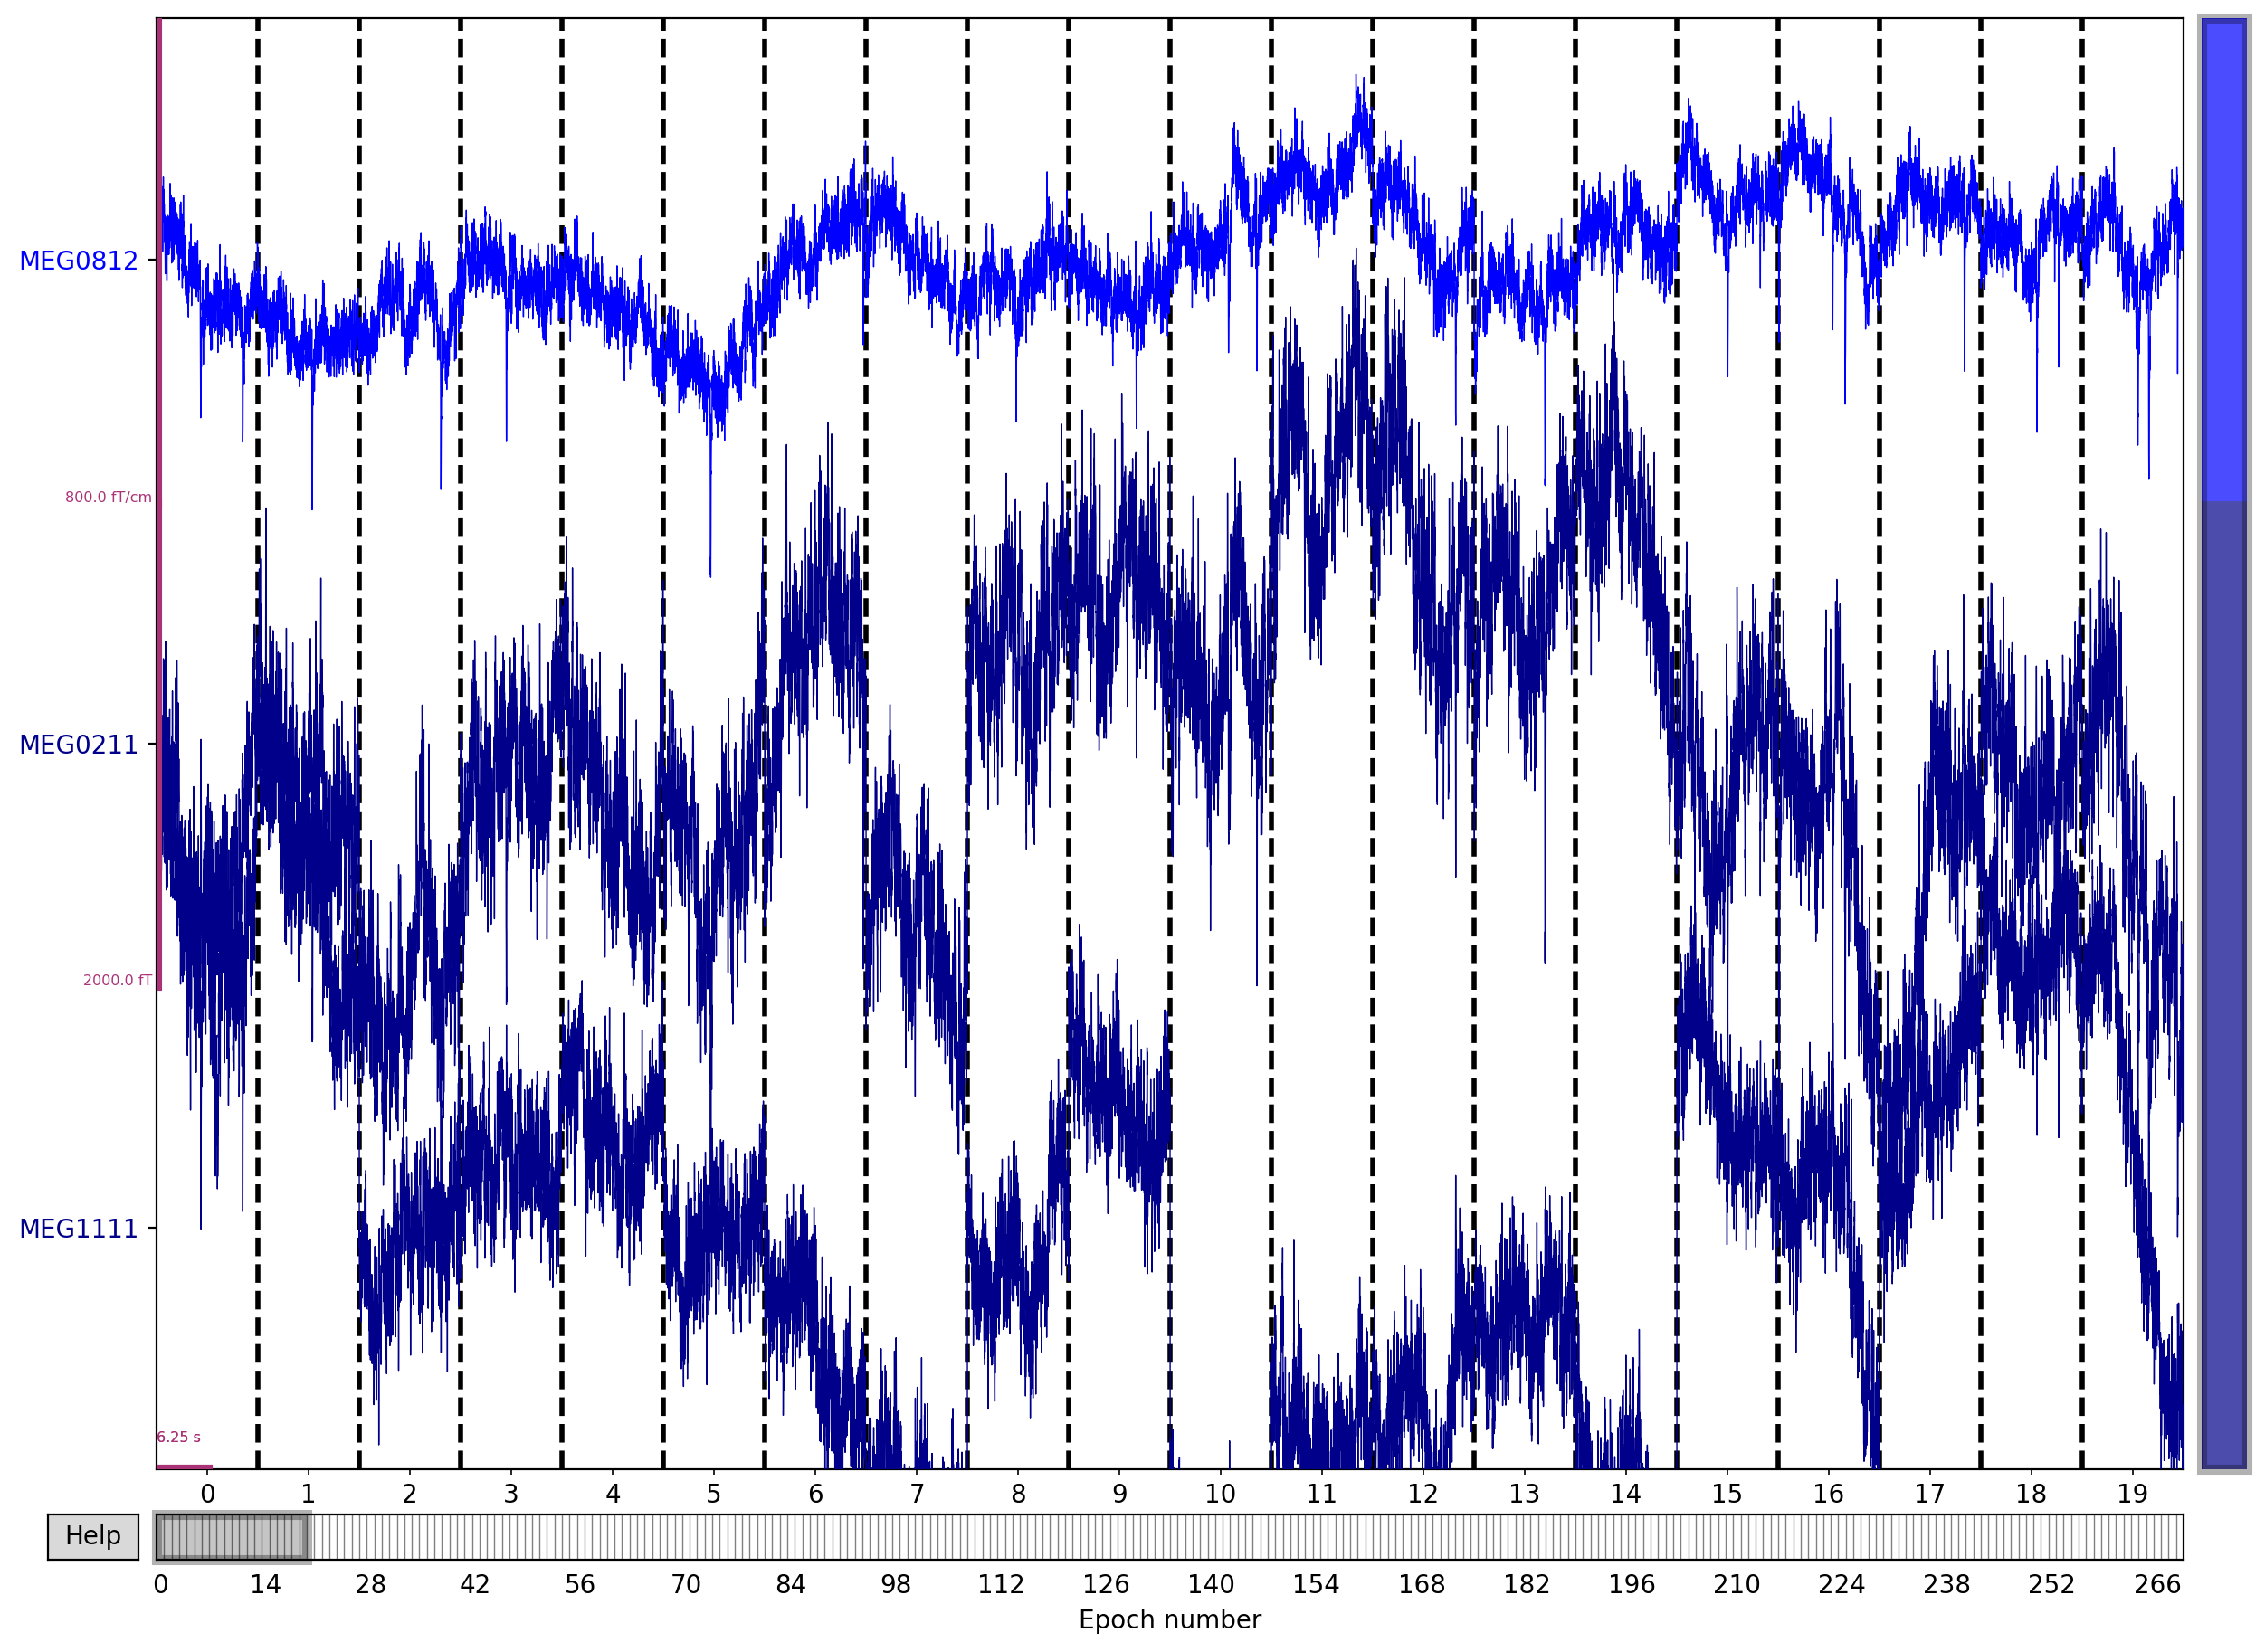

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [58]:
# ** Vizualizing the artifacts **
# pick some channels that clearly show heartbeats and blinks
epochs_sequences.plot(picks=['MEG1111', 'MEG0812', 'MEG0211'])

In [1]:
path_test='/Volumes/T5_EVO/1-experiments/REPLAYSEQ/1-data_ICM/3-epochs_sequences/mne-bids-pipeline/sub-01/meg/sub-01_task-reproduction_run-01_proc-sss_raw.fif'

In [7]:
raw=mne.io.read_raw_fif(path_test,preload=True)

Opening raw data file /Volumes/T5_EVO/1-experiments/REPLAYSEQ/1-data_ICM/3-epochs_sequences/mne-bids-pipeline/sub-01/meg/sub-01_task-reproduction_run-01_proc-sss_raw.fif...
    Range : 51000 ... 532999 =     51.000 ...   532.999 secs
Ready.
Reading 0 ... 481999  =      0.000 ...   481.999 secs...


In [14]:
raw.set_channel_types({'BIO002': 'eog'})  # Set BIO002 as EOG if it is not already set
raw.set_channel_types({'BIO003': 'ecg'})  # Example for setting a channel as EEG

/var/folders/14/1wp2gs4s4k9094qkx6kvfvq00000gn/T/ipykernel_13035/2984833418.py:1: RuntimeWarning: The unit for channel(s) BIO002 has changed from NA to V.
  raw.set_channel_types({'BIO002': 'eog'})  # Set BIO002 as EOG if it is not already set
/var/folders/14/1wp2gs4s4k9094qkx6kvfvq00000gn/T/ipykernel_13035/2984833418.py:2: RuntimeWarning: The unit for channel(s) BIO003 has changed from NA to V.
  raw.set_channel_types({'BIO003': 'ecg'})  # Example for setting a channel as EEG


Measurement date,"avril 10, 2024 08:53:23 GMT"
Experimenter,mne_anonymize
Participant,sub-01
Digitized points,505 points
Good channels,"9 misc, 1 EOG, 1 ECG, 128 EEG, 1 EXCI, 11 IAS, 102 Magnetometers, 204 Gradiometers, 1 Stimulus, 1 SYST"
Bad channels,None
EOG channels,BIO002
ECG channels,BIO003
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,330.00 Hz


In [13]:
raw.info

Measurement date,"avril 10, 2024 08:53:23 GMT"
Experimenter,mne_anonymize
Participant,sub-01
Digitized points,505 points
Good channels,"11 misc, 128 EEG, 1 EXCI, 11 IAS, 102 Magnetometers, 204 Gradiometers, 1 Stimulus, 1 SYST"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,330.00 Hz


In [16]:
montage = mne.channels.make_standard_montage('standard_1020')  # or any other standard montage
raw.set_montage(montage)

ValueError: DigMontage is only a subset of info. There are 128 channel positions not present in the DigMontage. The channels missing from the montage are:

['EEG001', 'EEG002', 'EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008', 'EEG009', 'EEG010', 'EEG011', 'EEG012', 'EEG013', 'EEG014', 'EEG015', 'EEG016', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG022', 'EEG023', 'EEG024', 'EEG025', 'EEG026', 'EEG027', 'EEG028', 'EEG029', 'EEG030', 'EEG031', 'EEG032', 'EEG033', 'EEG034', 'EEG035', 'EEG036', 'EEG037', 'EEG038', 'EEG039', 'EEG040', 'EEG041', 'EEG042', 'EEG043', 'EEG044', 'EEG045', 'EEG046', 'EEG047', 'EEG048', 'EEG049', 'EEG050', 'EEG051', 'EEG052', 'EEG053', 'EEG054', 'EEG055', 'EEG056', 'EEG057', 'EEG058', 'EEG059', 'EEG060', 'EEG061', 'EEG062', 'EEG063', 'EEG064', 'EEG065', 'EEG066', 'EEG067', 'EEG068', 'EEG069', 'EEG070', 'EEG071', 'EEG072', 'EEG073', 'EEG074', 'EEG075', 'EEG076', 'EEG077', 'EEG078', 'EEG079', 'EEG080', 'EEG081', 'EEG082', 'EEG083', 'EEG084', 'EEG085', 'EEG086', 'EEG087', 'EEG088', 'EEG089', 'EEG090', 'EEG091', 'EEG092', 'EEG093', 'EEG094', 'EEG095', 'EEG096', 'EEG097', 'EEG098', 'EEG099', 'EEG100', 'EEG101', 'EEG102', 'EEG103', 'EEG104', 'EEG105', 'EEG106', 'EEG107', 'EEG108', 'EEG109', 'EEG110', 'EEG111', 'EEG112', 'EEG113', 'EEG114', 'EEG115', 'EEG116', 'EEG117', 'EEG118', 'EEG119', 'EEG120', 'EEG121', 'EEG122', 'EEG123', 'EEG124', 'EEG125', 'EEG126', 'EEG127', 'EEG128'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

In [15]:
#eog_evoked=create_eog_epochs(raw,ch_name='BIO002').average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.


/var/folders/14/1wp2gs4s4k9094qkx6kvfvq00000gn/T/ipykernel_13035/210635938.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eog_evoked.plot_joint()


RuntimeError: Did not find any digitization points of kind FIFFV_POINT_EEG (3) in the info.

In [59]:
raw_seq=mne.io.read_raw_fif('',preload=True)
# We can get a summary of how the ocular artifact manifests across each channel type using
eog_evoked = create_eog_epochs().average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

RuntimeError: No EOG channel(s) found

In [24]:
path_raw_resting_03=resting_state_path+'/sub-01_task-reproduction_run-03_proc-sss_raw.fif'

filt_raw=mne.io.read_raw_fif(path_raw_resting_03, preload=True).crop(tmin=312,tmax=400)

Opening raw data file /Volumes/T5_EVO/1-experiments/REPLAYSEQ/1-data_ICM/1-epochs_resting_state/mne-bids-pipeline/sub-01/meg/sub-01_task-reproduction_run-03_proc-sss_raw.fif...
    Range : 55000 ... 456999 =     55.000 ...   456.999 secs
Ready.
Reading 0 ... 401999  =      0.000 ...   401.999 secs...


In [29]:
# ** ICA for resting state **

# -- Load resting state run 03 : Necessary for ecg_epochs
path_raw_resting_03=resting_state_path+'/sub-01_task-reproduction_run-03_proc-sss_raw.fif'

# -- Compute ICA
resting_raw_03=mne.io.read_raw_fif(path_raw_resting_03, preload=True).crop(tmin=312,tmax=400)
ica = ICA(n_components=15, method="fastica", max_iter="auto").fit(resting_raw_03)

ecg_epochs = create_ecg_epochs(resting_raw_03, tmin=-0.5, tmax=0.5)
ecg_inds, scores = ica.find_bads_ecg(ecg_epochs, threshold="auto")

ica.plot_components(ecg_inds)

Opening raw data file /Volumes/T5_EVO/1-experiments/REPLAYSEQ/1-data_ICM/1-epochs_resting_state/mne-bids-pipeline/sub-01/meg/sub-01_task-reproduction_run-03_proc-sss_raw.fif...
    Range : 55000 ... 456999 =     55.000 ...   456.999 secs
Ready.
Reading 0 ... 401999  =      0.000 ...   401.999 secs...
Fitting ICA to data using 434 channels (please be patient, this may take a while)


/var/folders/14/1wp2gs4s4k9094qkx6kvfvq00000gn/T/ipykernel_16502/4095154655.py:8: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica = ICA(n_components=15, method="fastica", max_iter="auto").fit(resting_raw_03)


Selecting by number: 15 components
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Exten

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Fitting ICA took 16.8s.
Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 10000 samples (10.000 s)

Number of ECG events detected : 121 (average pulse 82 / min.)
Not setting metadata
121 matching events found
No baseline correction applied
Using data from preloaded Raw for 121 events and 1001 original time points ...
1 bad epochs dropped
Reconstructing ECG signal from Magnetometers
Using threshold: 0.16 for CTPS ECG detection


ValueError: No appropriate components found for the given picks ([])

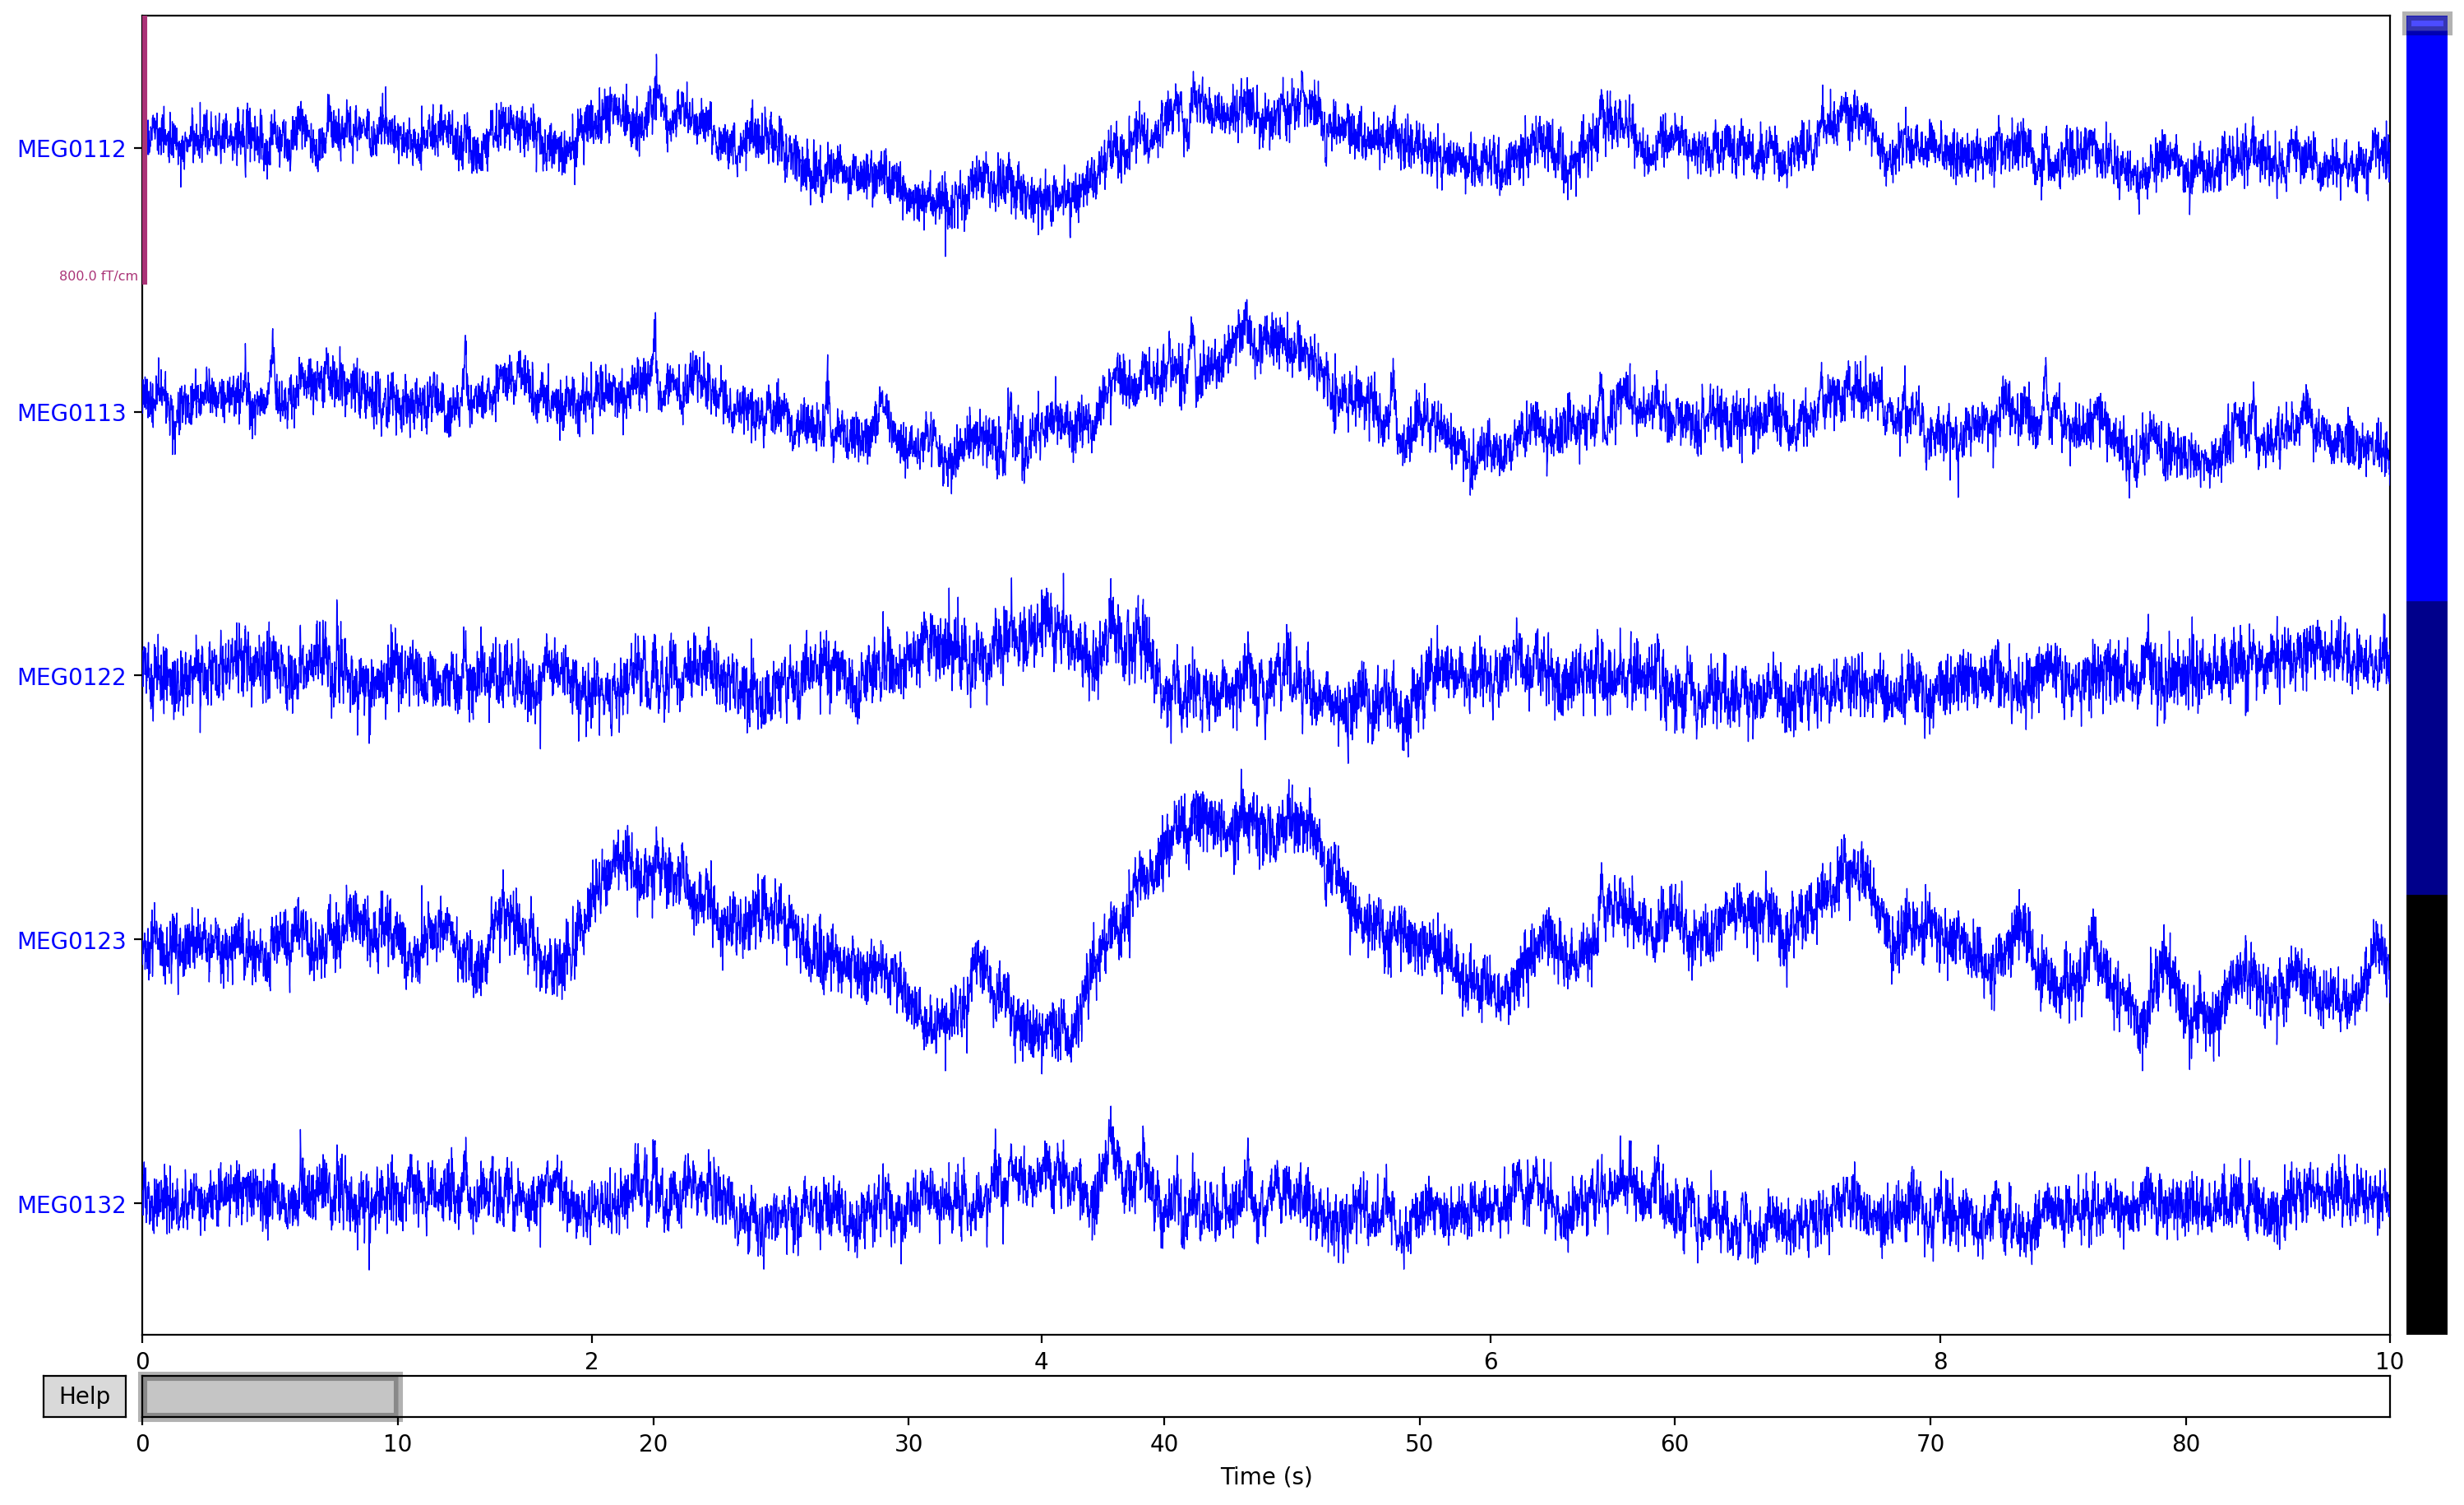

Channels marked as bad:
none
Channels marked as bad:
none


In [34]:
resting_raw_03.plot(n_channels=5)

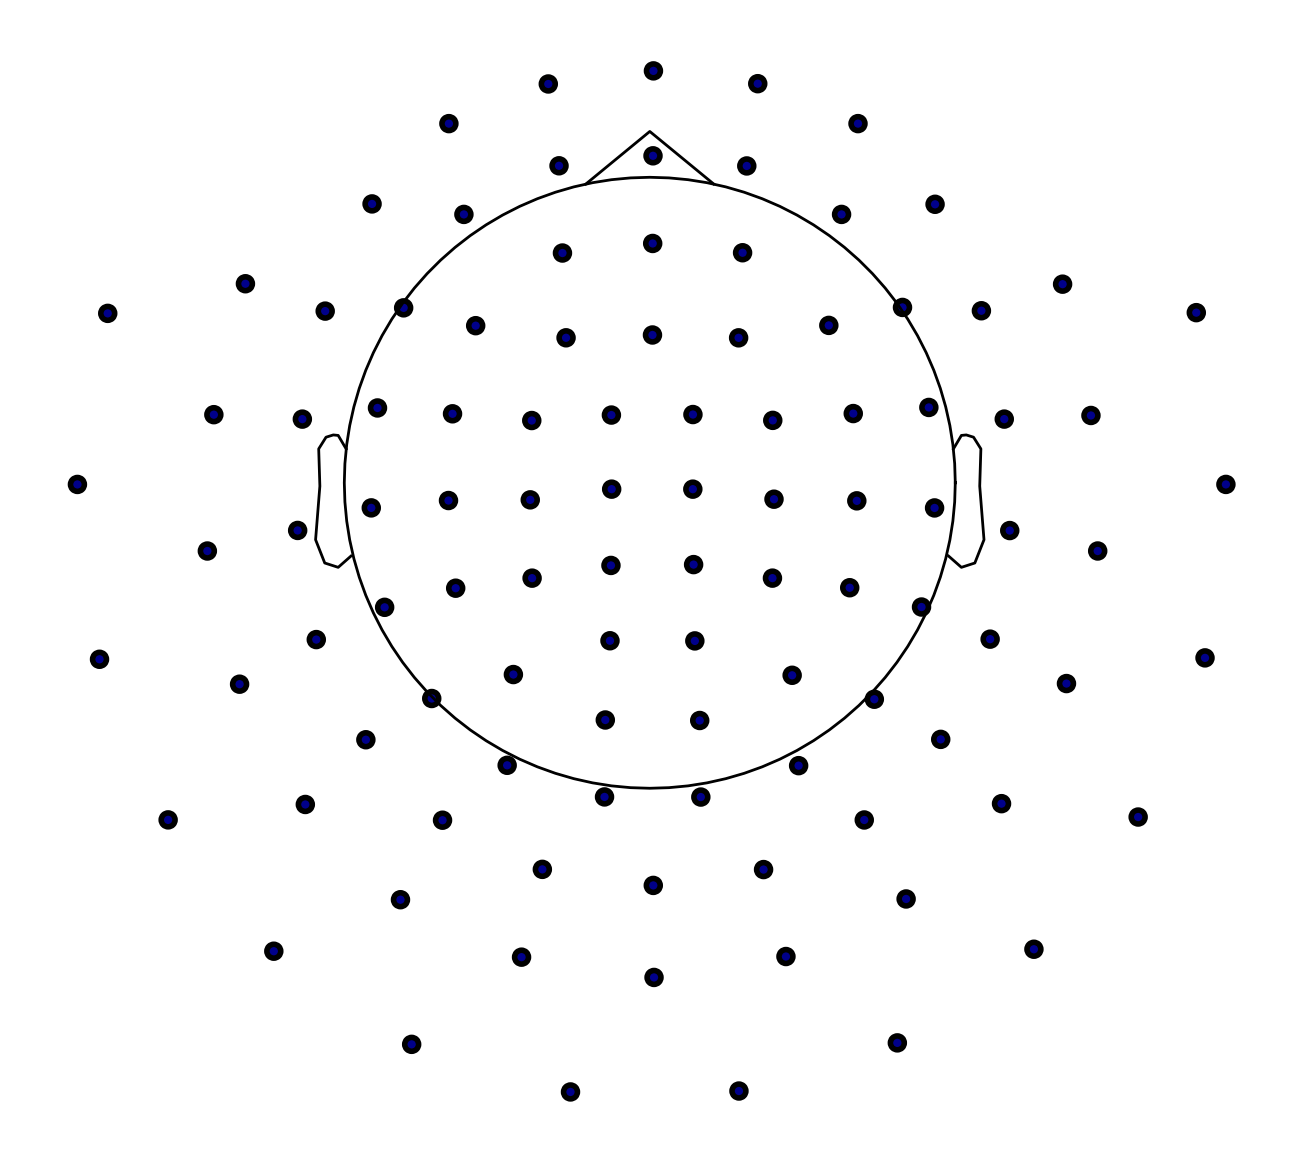

In [40]:
resting_raw_03.plot_sensors()